In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [67]:
# Impute numeric missing values with median
df = df.fillna(df.median(numeric_only=True))

In [68]:

file_path = r"C:\Users\Hitansh\Desktop\PROJECT 4\Processed_Flipdata - Processed_Flipdata.csv"
df = pd.read_csv(file_path)

# Drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('__', '_').str.rstrip('_')

# Convert 'Prize' column to numeric by removing commas
df['Prize'] = df['Prize'].str.replace(',', '').astype(float)

# Save the cleaned DataFrame
cleaned_file_path = r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned file saved to: {cleaned_file_path}")



Cleaned file saved to: C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv


In [69]:
df = pd.read_csv(r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv")

In [70]:
# Top 10 excluding 'Prize'
correlation_matrix = df.corr(numeric_only=True)
cor_target = correlation_matrix['Prize'].sort_values(ascending=False)
top_corr_features = cor_target[1:11]  

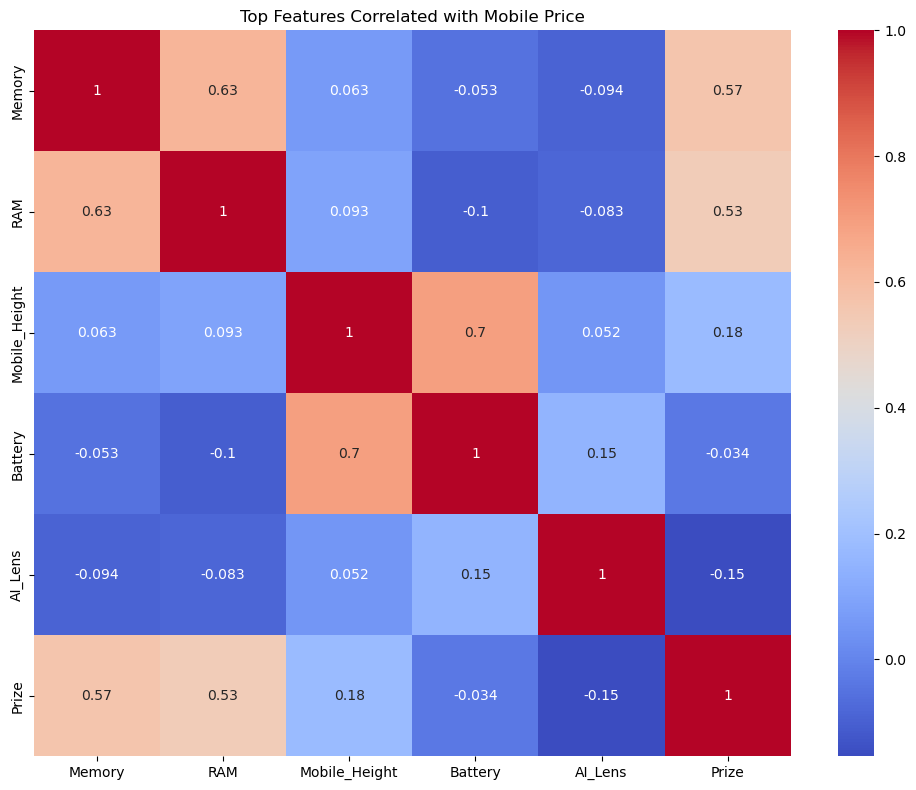

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features.index.tolist() + ['Prize']].corr(), annot=True, cmap='coolwarm')
plt.title("Top Features Correlated with Mobile Price")
plt.tight_layout()
plt.show()


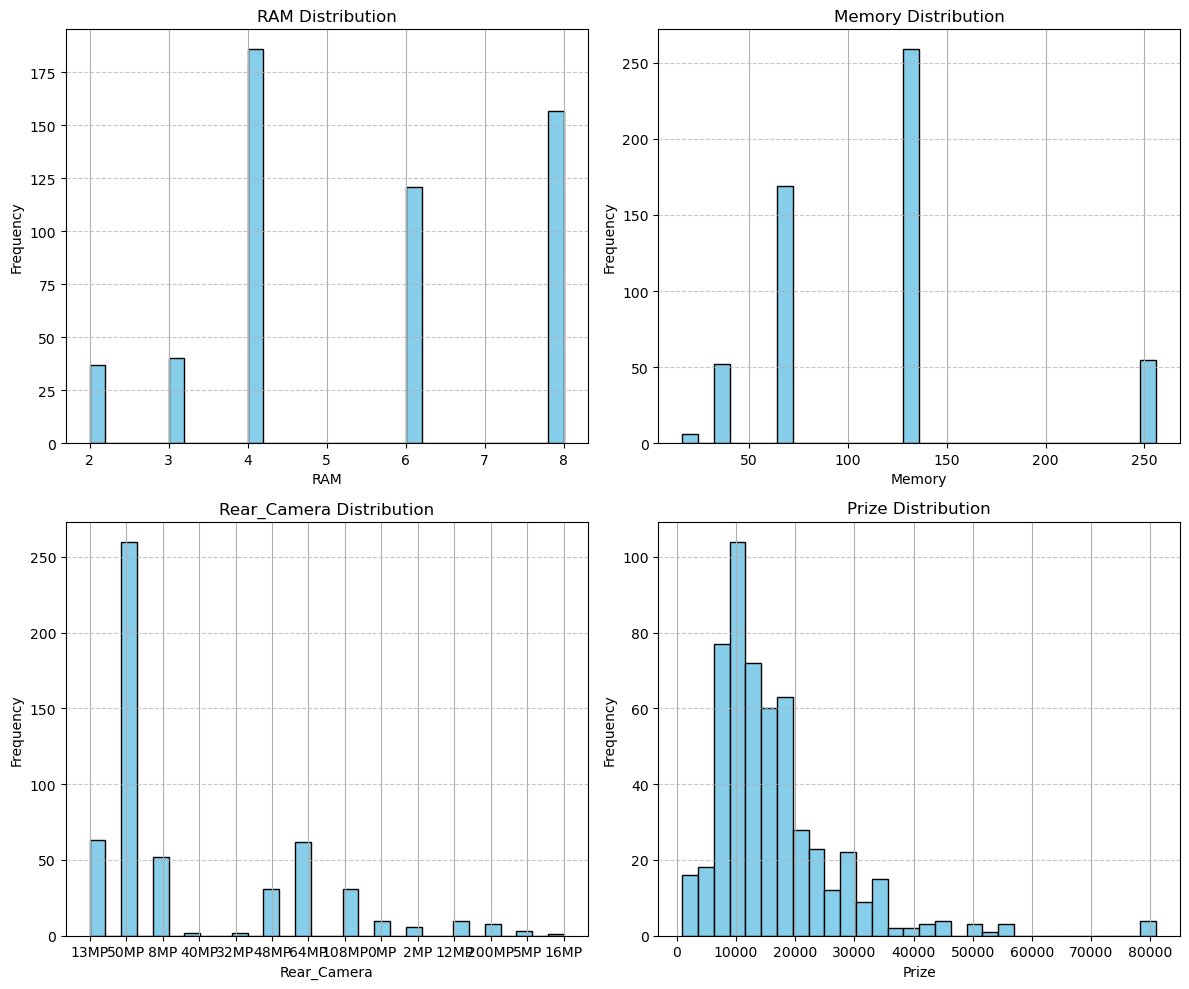

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv(r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv")

# Features to visualize
features = ['RAM', 'Memory', 'Rear_Camera', 'Prize']

# Create histogram plots
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    df[feature].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


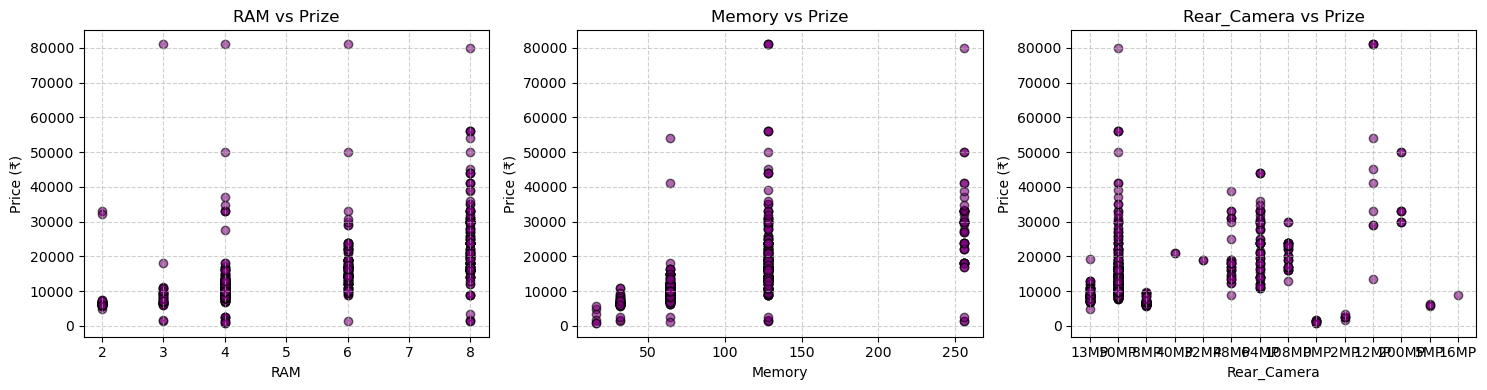

In [73]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv(r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv")

# Features to analyze
features = ['RAM', 'Memory', 'Rear_Camera']

# Create scatter plots for each feature vs. Prize
plt.figure(figsize=(15, 4))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    plt.scatter(df[feature], df['Prize'], alpha=0.6, color='purple', edgecolors='k')
    plt.title(f'{feature} vs Prize')
    plt.xlabel(feature)
    plt.ylabel('Price (₹)')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [74]:
# Import required library
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.read_csv(r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv")

# Check for columns before scaling (optional)
print("Before Scaling:")
print(df[['RAM', 'Memory', 'Battery']].describe())

scaler = MinMaxScaler()
df[['RAM', 'Memory', 'Battery']] = scaler.fit_transform(df[['RAM', 'Memory', 'Battery']])

print("\nAfter Scaling (Min: 0, Max: 1):")
print(df[['RAM', 'Memory', 'Battery']].describe())


Before Scaling:
              RAM      Memory      Battery
count  541.000000  541.000000   541.000000
mean     5.397412  110.550832  4871.587800
std      1.984923   60.600694   780.148862
min      2.000000   16.000000   800.000000
25%      4.000000   64.000000  5000.000000
50%      6.000000  128.000000  5000.000000
75%      8.000000  128.000000  5000.000000
max      8.000000  256.000000  7000.000000

After Scaling (Min: 0, Max: 1):
              RAM      Memory     Battery
count  541.000000  541.000000  541.000000
mean     0.566235    0.393962    0.656708
std      0.330820    0.252503    0.125830
min      0.000000    0.000000    0.000000
25%      0.333333    0.200000    0.677419
50%      0.666667    0.466667    0.677419
75%      1.000000    0.466667    0.677419
max      1.000000    1.000000    1.000000


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv")

# Define the features and target
X = df.drop('Prize', axis=1)
y = df['Prize']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y for easy analysis
train_set = X_train.copy()
train_set['Prize'] = y_train

test_set = X_test.copy()
test_set['Prize'] = y_test

# Select numeric features for analysis
features_to_compare = ['Memory', 'RAM', 'Battery', 'AI_Lens', 'Mobile_Height', 'Prize']

# Create summary statistics
summary_df = pd.DataFrame({
    'Train Mean': train_set[features_to_compare].mean(),
    'Train Std': train_set[features_to_compare].std(),
    'Test Mean': test_set[features_to_compare].mean(),
    'Test Std': test_set[features_to_compare].std()
})

summary_df = summary_df.round(2)

print("Train vs Test Summary Statistics:")
display(summary_df)


Train vs Test Summary Statistics:


,Train Mean,Train Std,Test Mean,Test Std
Memory,110.93,59.48,109.06,65.11
RAM,5.42,1.99,5.29,1.98
Battery,4867.49,789.43,4887.83,745.52
AI_Lens,0.05,0.22,0.10,0.30
Mobile_Height,16.38,2.35,16.64,3.12
Prize,16376.89,10535.58,15639.75,11794.23


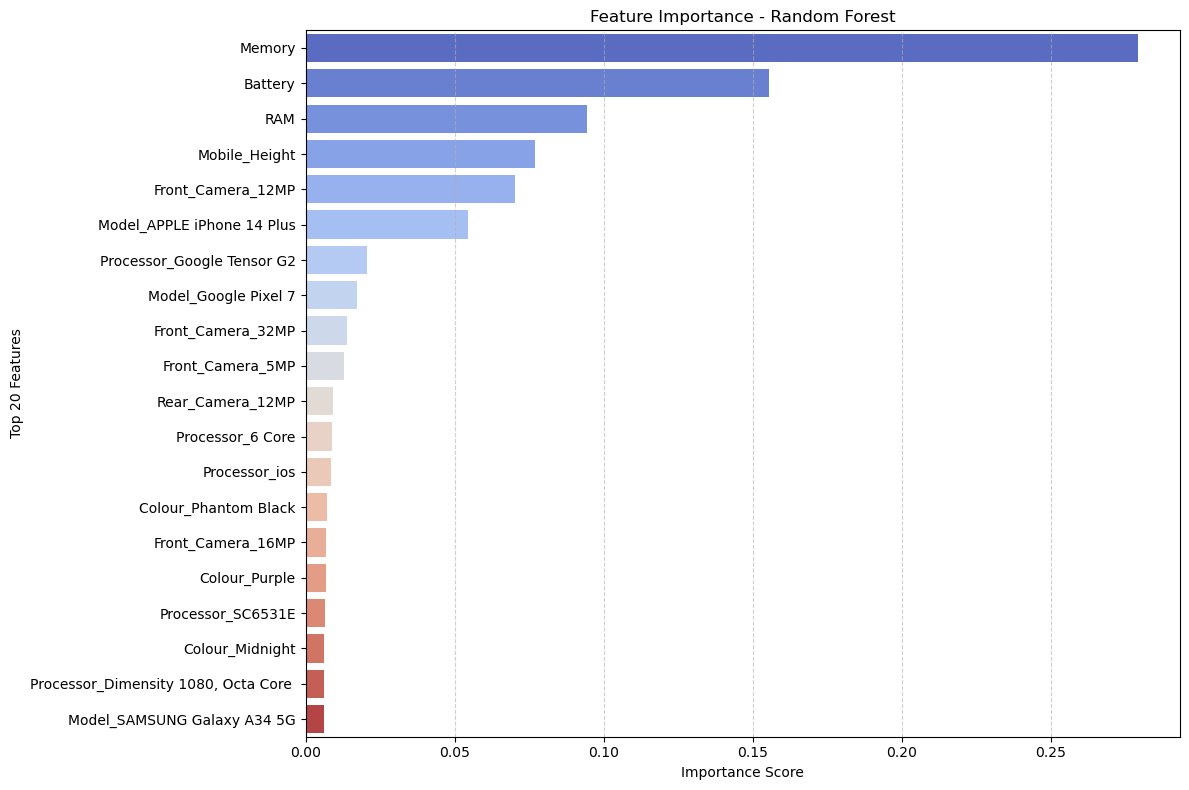

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv")

# Separate features and target
X = df.drop('Prize', axis=1)
y = df['Prize']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for importance
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='coolwarm')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Top 20 Features")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

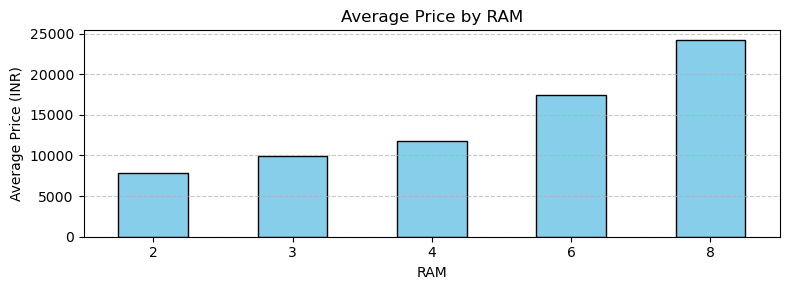

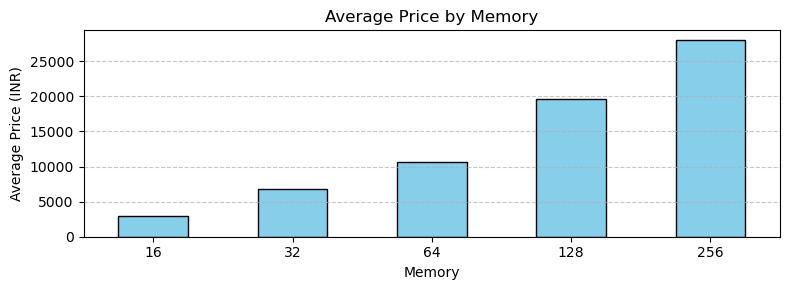

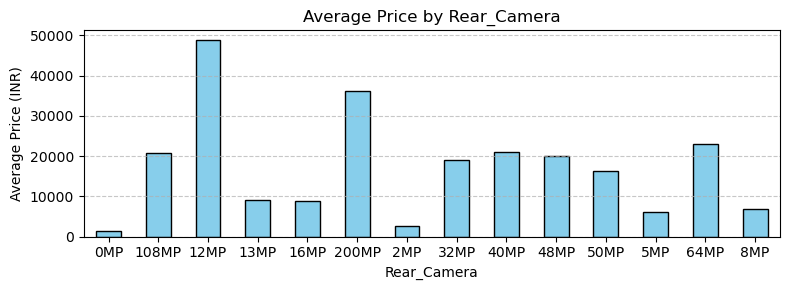

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv")  

features_to_plot = ['RAM', 'Memory', 'Rear_Camera']

# Plot average price grouped by each selected feature
for feature in features_to_plot:
    plt.figure(figsize=(8, 3))
    df.groupby(feature)['Prize'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Average Price by {feature}')
    plt.ylabel('Average Price (INR)')
    plt.xlabel(feature)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


Mean Squared Error: 20702119.30
R-squared Score: 0.85


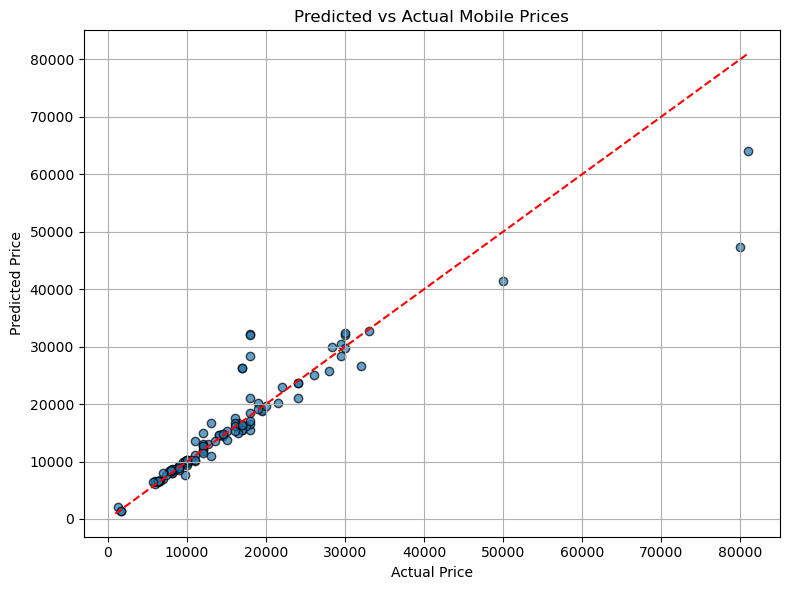

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import re

df = pd.read_csv(r"C:\Users\Hitansh\Desktop\PROJECT 4\Cleaned_Flipdata.csv")

# Extract the first number from Rear_Camera and Front_Camera strings
df['Rear_Camera'] = df['Rear_Camera'].str.extract(r'(\d+\.?\d*)').astype(float)
df['Front_Camera'] = df['Front_Camera'].str.extract(r'(\d+\.?\d*)').astype(float)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Model', 'Colour', 'Processor'], drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['Prize'])
y = df_encoded['Prize']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, edgecolor='black', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Mobile Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
import pandas as pd

# Combine actual and predicted prices into a DataFrame
results_df = pd.DataFrame({
    'Actual_Price': y_test.values,
    'Predicted_Price': y_pred
})

results_df = results_df.round(2)

# Display the first 10 results
print(results_df.head(10))


   Actual_Price  Predicted_Price
0        8499.0          8496.89
1        6299.0          6541.40
2       19499.0         19044.60
3       10999.0         11139.96
4       12599.0         13120.27
5       14499.0         14354.00
6        9999.0          9783.88
7       17999.0         15550.13
8       29499.0         30359.69
9        9790.0          7690.50


In [80]:
# Calculate average predicted price
average_predicted_price = y_pred.mean()

average_predicted_price = round(average_predicted_price, 2)

print(f"The average predicted mobile price is ₹{average_predicted_price}")


The average predicted mobile price is ₹15628.91


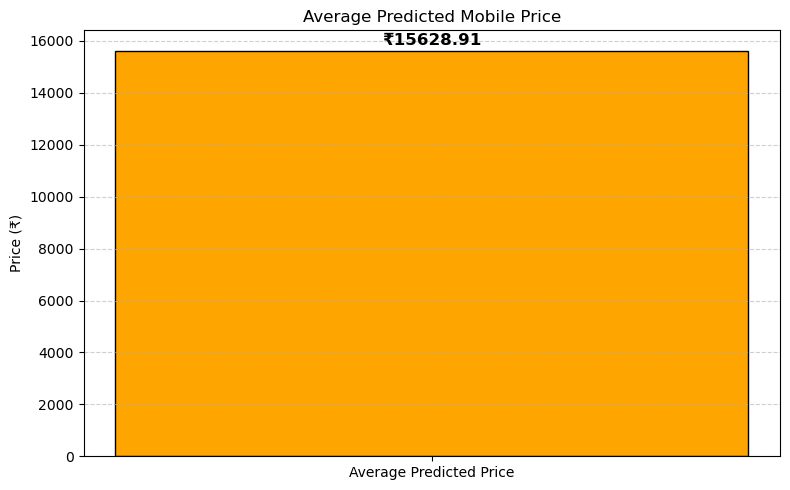

In [81]:
import matplotlib.pyplot as plt

# Calculate average predicted price
average_predicted_price = y_pred.mean()
average_predicted_price = round(average_predicted_price, 2)

# Create a plot to show average predicted price
plt.figure(figsize=(8, 5))
plt.bar(['Average Predicted Price'], [average_predicted_price], color='orange', edgecolor='black')
plt.title("Average Predicted Mobile Price")
plt.ylabel("Price (₹)")
plt.text(0, average_predicted_price + 100, f"₹{average_predicted_price}", 
         ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
